In [1]:
%matplotlib inline
%autosave 0

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Autosave disabled


In [2]:
# Read iris data.
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


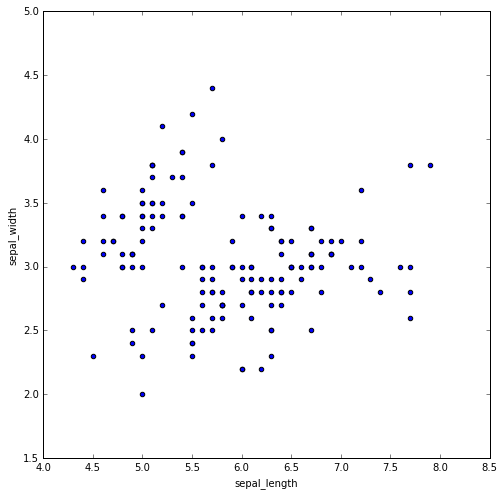

In [3]:
# Plot sepal length against sepal width.
df.plot(x='sepal_length', y='sepal_width', kind='scatter', figsize=(8,8))

In [4]:
# Choose a random point from the data set.
import random

random.seed()
pt = df.iloc[random.choice(df.index.tolist())]
pt['sepal_length']

7.0999999999999996

In [5]:
# Create a new dataframe that contains the distance of every point from our randomly chosen point
import math

def dist_from_pt(p):
    """Calculate the distance of a point to a randomly chosen point."""
    return math.sqrt(((pt.sepal_length - p.sepal_length) ** 2) + ((pt.sepal_width - p.sepal_width) ** 2))

df['dist_from_pt'] = df[['sepal_length', 'sepal_width']].apply(func=dist_from_pt, axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,dist_from_pt
0,5.1,3.5,1.4,0.2,Iris-setosa,2.061553
1,4.9,3.0,1.4,0.2,Iris-setosa,2.200000
2,4.7,3.2,1.3,0.2,Iris-setosa,2.408319
3,4.6,3.1,1.5,0.2,Iris-setosa,2.501999
4,5.0,3.6,1.4,0.2,Iris-setosa,2.184033


In [6]:
# Look at 10 nearest neighbors.
df_sorted = df.sort_values(by='dist_from_pt', ascending=True)
df_sorted[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species,dist_from_pt
102,7.1,3.0,5.9,2.1,Iris-virginica,0.000000
129,7.2,3.0,5.8,1.6,Iris-virginica,0.100000
141,6.9,3.1,5.1,2.3,Iris-virginica,0.223607
139,6.9,3.1,5.4,2.1,Iris-virginica,0.223607
52,6.9,3.1,4.9,1.5,Iris-versicolor,0.223607
50,7.0,3.2,4.7,1.4,Iris-versicolor,0.223607
107,7.3,2.9,6.3,1.8,Iris-virginica,0.223607
125,7.2,3.2,6.0,1.8,Iris-virginica,0.223607
120,6.9,3.2,5.7,2.3,Iris-virginica,0.282843
112,6.8,3.0,5.5,2.1,Iris-virginica,0.300000


In [14]:
df_sorted['species'][0:10].value_counts().index[0]

'Iris-virginica'

In [17]:
def knn(k):
    """knn returns the majority class for the k nearest neighbors."""
    return df_sorted['species'][0:k].value_counts().index[0]

In [19]:
knn(50)

'Iris-virginica'